## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 2 #

### esercizio 2.1 

abbiamo calcolato il seguente integrale:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

procedendo in due modi, entrambi via Montecarlo, il primo con campionamento di distribuzione di probabilità uniforme nell'intervallo di integrazione, il secondo campionando una distribuzione di probabilità che approssimi meglio l'integranda rispetto alla distribuzione uniforme. La tecnica in questione è detta importance sampling e la ditribuzione utilizzata è la distribuzione lineare: $P(x)=2(1-x)$

Di seguito è riportata una rappresentazione dell'integranda, della uniforme e di P(x)

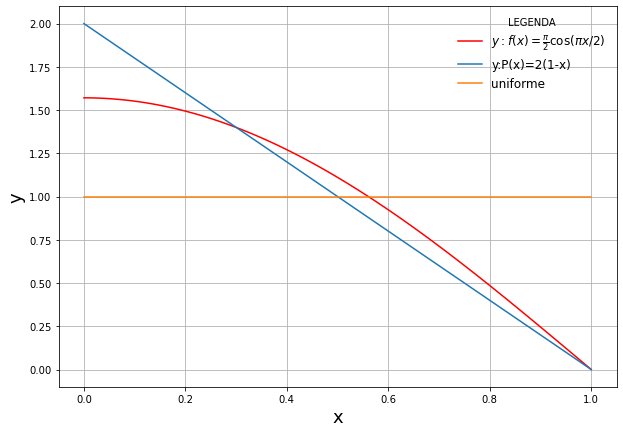

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(10,7))
x = np.linspace(0., 1., 100)
f = np.cos(math.pi/2. * x)
P = 2*(1 - x) 
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.plot(x, math.pi/2. * f,color='red',label=r'$y:f(x)=\frac{\pi}{2}\cos(\pi x/2)$')
plt.plot(x, P,label='y:P(x)=2(1-x)')
plt.plot([0,1],[1,1],label='uniforme')
plt.legend(loc="best", title="LEGENDA", frameon=False, fontsize=12)
plt.grid(True)
plt.show()

Si può notare come pur essendo una distribuzione solo di primo grado, essa approssimi meglio l'integranda di quanto lo faccia la distribuzione uniforme

per il campionamento secondo P(x) è stato utilizzato il metodo dell'inversione della cumulativa, e per la stima dell'integrale e per l'incertezza statistica è stato utilizzato il metodo dei blocchi

Sono riportati di seguito i grafici della stima dell'integrale in funzione del numero di blocchi

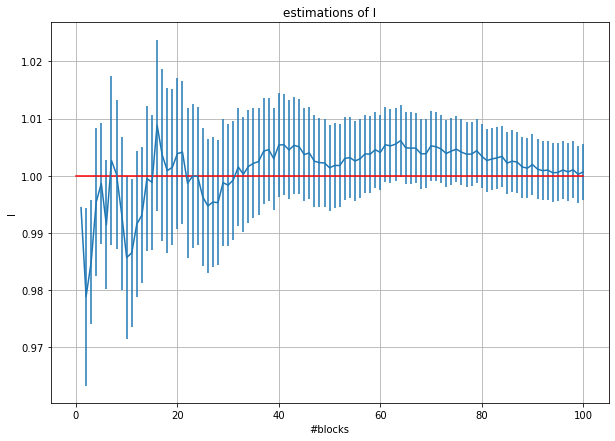

Risultato finale : 
1.000655
Incertezza : 
0.004937


In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(10,7))
x, Iunif, error = np.loadtxt("output2.1.1.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(x,Iunif,error)
plt.title('estimations of I')
plt.xlabel('#blocks')
plt.ylabel('I')
plt.grid(True)
plt.plot([0,100],[1,1], color="red")
plt.show()

print('Risultato finale : ')
print(Iunif[-1])
print('Incertezza : ')
print(error[-1])

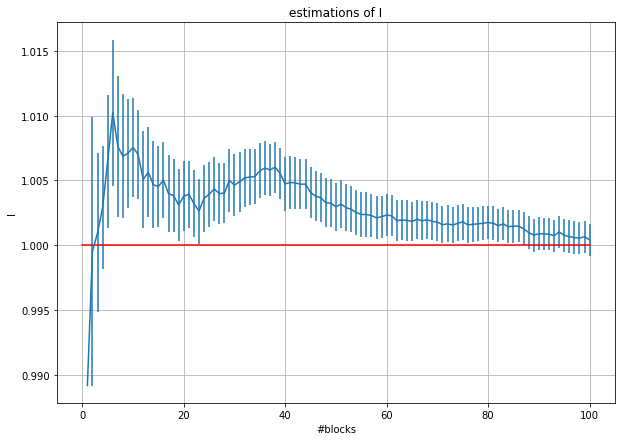

Risultato finale : 
1.000411
Incertezza : 
0.001241


In [54]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.figure(figsize=(10,7))
x, Iimp, error = np.loadtxt("output2.1.2.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.errorbar(x,Iimp,error)
plt.title('estimations of I')
plt.xlabel('#blocks')
plt.ylabel('I')
plt.grid(True)
plt.plot([0,100],[1,1], color="red")
plt.show()

print('Risultato finale : ')
print(Iimp[-1])
print('Incertezza : ')
print(error[-1])

in rosso sono riportati i valori attesi dell'integrale noto.

Si può notare come entrambi i risultati siano compatibili con il valore atteso, ma con il campionamento sencodo P(x) l'incertezza sia circa 1/4 di quella ottenuta con la distribuzione uniforme

### esercizio 2.2

In questo esercizi è stata effettuata la simulazione di due 3DRandomWalk(RW), uno secondo un reticolo tridimensionale e un altro nel continuo.
Entrambi i RW sono caratterizzati da un passo costante pari ad 1.

Per la realizzazione del RandomWalk discreto è stato creato un array di interi di dimensione 6, ogni posizione corrisponde ad un incremento, infatti 3 direzione e per ogni direzione la possibilità di avanzare o retrocedere

Per la realizzazione di quello continuo invece è stato generato un angolo solido casuale, e per fare ciò sono serviti 2 angoli $\theta$ e $\phi$, angoli delle cordinate sferiche, generati casualmente rispettivamente tra $[0,\pi]$ e $[0,2\pi]$. Mentre l'angolo $\phi$ viene generato uniformemente tra $[0,2\pi]$ per l'angolo $\theta$ è diverso, infatti bisogna adottare il metodo dell'inversione della cumulativa per rimanere consistenti con il fatto che l'elemento di volume infinitesimo sferico non è $d\theta$$d\phi$ ma è $sin(\theta)d\theta$$d\phi$

Scopo di questo esercizio era studiare l'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, dove $\vec{r}_N$ rappresenta la distanza dopo ogni step dal punto attuale al punto iniziale, fissato nell'origine, in funzione del numeoro di passi.
Successivamente conforntare il risultato con l'andamento $k\sqrt{N}$ e verificare la loro compatibilità.
Per far ciò è stato utilizzato il metodo dei blocchi con: 100 Blocchi, 100 RW da 100 passi per blocco per ognuna delle due tipologie di RW da studiare.

Vengono riportati di seguito i grafici con i risultati degli studi.

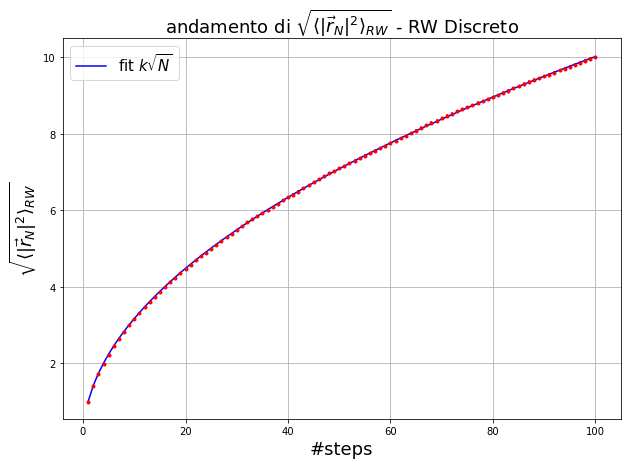

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x, rN, error = np.loadtxt("output2.2.discr.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,rN,error, fmt='.', color='red')

p_opt, p_cov = curve_fit(f, x, rN, bounds=([0],[2]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit, color='b', label = 'fit $k\sqrt{N}$') # plotting fitted function
plt.legend(loc='best', fontsize=15)

plt.title(r'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ - RW Discreto',fontsize=18)
plt.xlabel('#steps',fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$',fontsize=18)
plt.grid(True)
plt.show()

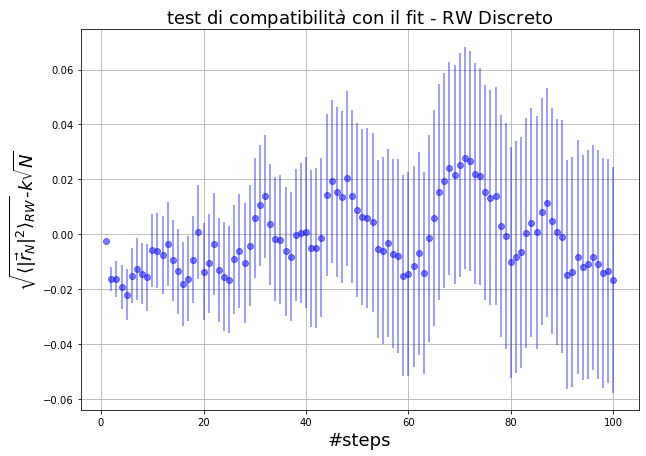

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x, rN, error = np.loadtxt("output2.2.discr.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
p_opt, p_cov = curve_fit(f, x, rN, bounds=([0],[2]))
y_fit = f(x,p_opt[0])
plt.figure(figsize=(10,7))
plt.errorbar(x,rN-y_fit,error, fmt='o', color='blue',alpha=0.5)



plt.title('test di compatibilit$à$ con il fit - RW Discreto',fontsize=18)
plt.xlabel('#steps',fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$-$k\sqrt{N}$',fontsize=18)
plt.grid(True)
plt.show()


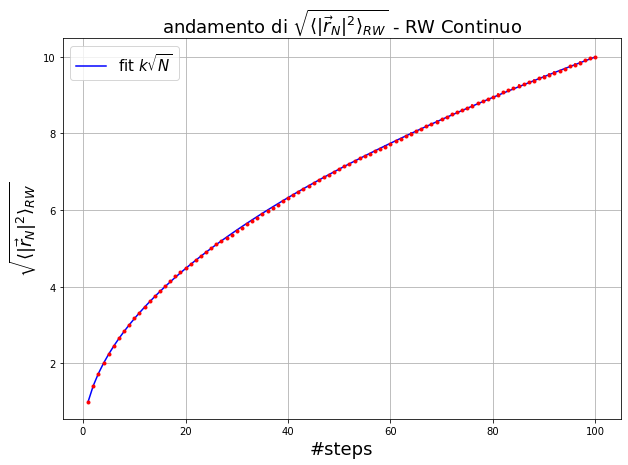

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x, rN, error = np.loadtxt("output2.2.cont.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
plt.figure(figsize=(10,7))
plt.errorbar(x,rN,error, fmt='.', color='red')

p_opt, p_cov = curve_fit(f, x, rN, bounds=([0],[2]))
y_fit = f(x,p_opt[0])
plt.plot(x,y_fit, color='b', label = 'fit $k\sqrt{N}$') # plotting fitted function
plt.legend(loc='best', fontsize=15)

plt.title(r'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ - RW Continuo',fontsize=18)
plt.xlabel('#steps',fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$',fontsize=18)
plt.grid(True)
plt.show()

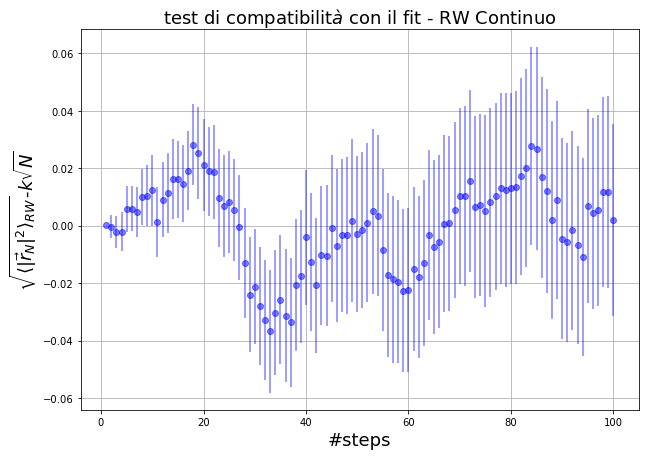

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

x, rN, error = np.loadtxt("output2.2.cont.txt", usecols=(0,1,2), delimiter='\t', unpack='true')
p_opt, p_cov = curve_fit(f, x, rN, bounds=([0],[2]))
y_fit = f(x,p_opt[0])
plt.figure(figsize=(10,7))
plt.errorbar(x,rN-y_fit,error, fmt='o', color='blue',alpha=0.5)



plt.title('test di compatibilit$à$ con il fit - RW Continuo',fontsize=18)
plt.xlabel('#steps',fontsize=18)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$-$k\sqrt{N}$',fontsize=18)
plt.grid(True)
plt.show()

si può notare che i valori ottenuti sono compatibili con quelli dell'andamento $k\sqrt{N}$